<a href="https://colab.research.google.com/github/Balajii31/DATA-SCIENCE-TASKS/blob/main/Pandas_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Combining Datasets: Concat and Append

In [ ]:
import pandas as pd
import numpy as np

## Recall: Concatenation of NumPy Arrays

Concatenation of ``Series`` and ``DataFrame`` objects is very similar to concatenation of Numpy arrays, which can be done via the ``np.concatenate`` function as discussed in [The Basics of NumPy Arrays](02.02-The-Basics-Of-NumPy-Arrays.ipynb).
Recall that with it, you can combine the contents of two or more arrays into a single array:

In [ ]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

## Simple Concatenation with ``pd.concat``

Pandas has a function, ``pd.concat()``, which has a similar syntax to ``np.concatenate`` but contains a number of options that we'll discuss momentarily:

```python
# Signature in Pandas v0.18
pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)
```

``pd.concat()`` can be used for a simple concatenation of ``Series`` or ``DataFrame`` objects, just as ``np.concatenate()`` can be used for simple concatenations of arrays:

In [ ]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

By default, the concatenation takes place row-wise within the ``DataFrame`` (i.e., ``axis=0``).
Like ``np.concatenate``, ``pd.concat`` allows specification of an axis along which concatenation will take place.
Consider the following example:

In [ ]:
# creating the DataFrames
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3']})

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7']})

In [ ]:
df1

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [ ]:
df2

,A,B
0,A4,B4
1,A5,B5
2,A6,B6
3,A7,B7


In [ ]:
#Concatenation column wise
pd.concat([df1,df2],axis=1)

,A,B,A,B
0,A0,B0,A4,B4
1,A1,B1,A5,B5
2,A2,B2,A6,B6
3,A3,B3,A7,B7


We could have equivalently specified ``axis=1``; here we've used the more intuitive ``axis='col'``.

In [ ]:
#Concatenation row wise
pd.concat([df1,df2],axis=0)


,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3
0,A4,B4
1,A5,B5
2,A6,B6
3,A7,B7


In [ ]:
df1.append(df2)

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3
0,A4,B4
1,A5,B5
2,A6,B6
3,A7,B7


### Duplicate indices

One important difference between ``np.concatenate`` and ``pd.concat`` is that Pandas concatenation *preserves indices*, even if the result will have duplicate indices!


Notice the repeated indices in the result.
While this is valid within ``DataFrame``s, the outcome is often undesirable.
``pd.concat()`` gives us a few ways to handle it.

#### Ignoring the index

Sometimes the index itself does not matter, and you would prefer it to simply be ignored.
This option can be specified using the ``ignore_index`` flag.
With this set to true, the concatenation will create a new integer index for the resulting ``Series``:

In [ ]:
pd.concat([df1,df2], ignore_index=True)

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4
5,A5,B5
6,A6,B6
7,A7,B7


### Concatenation with joins

In the simple examples we just looked at, we were mainly concatenating ``DataFrame``s with shared column names.
In practice, data from different sources might have different sets of column names, and ``pd.concat`` offers several options in this case.
Consider the concatenation of the following two ``DataFrame``s, which have some (but not all!) columns in common:

In [ ]:
# creating the DataFrames
df1 = pd.DataFrame({'Name': ['Arun', 'Vijay', 'Gopal', 'Gowri','Govindh'],
                    'RollNo': [1,2,3,4,5],
                    'Marks':[80,75,25,35,79]})

df2 = pd.DataFrame({'Name': ['Arun', 'Vijay', 'Gopal', 'Gowri','Krishna'],
                    'Dept': ['CSE','IT','CSE','MECH','AUTO']})

In [ ]:
df1

,Name,RollNo,Marks
0,Arun,1,80
1,Vijay,2,75
2,Gopal,3,25
3,Gowri,4,35
4,Govindh,5,79


In [ ]:
df2

,Name,Dept
0,Arun,CSE
1,Vijay,IT
2,Gopal,CSE
3,Gowri,MECH
4,Krishna,AUTO


TYPES OF JOIN

---

1. INNER JOIN
2. LEFT JOIN
3. RIGHT JOIN
4. FULL OUTER

In [ ]:
# inner join - only common names in both tables
pd.merge(df1, df2, on='Name', how='inner')

,Name,RollNo,Marks,Dept
0,Arun,1,80,CSE
1,Vijay,2,75,IT
2,Gopal,3,25,CSE
3,Gowri,4,35,MECH


In [ ]:
# Left join -returns all rows of first/left table
pd.merge(df1, df2, on='Name', how='left')

,Name,RollNo,Marks,Dept
0,Arun,1,80,CSE
1,Vijay,2,75,IT
2,Gopal,3,25,CSE
3,Gowri,4,35,MECH
4,Govindh,5,79,NaN


In [ ]:
# Right join
pd.merge(df1, df2, on='Name', how='right')

,Name,RollNo,Marks,Dept
0,Arun,1.0,80.0,CSE
1,Vijay,2.0,75.0,IT
2,Gopal,3.0,25.0,CSE
3,Gowri,4.0,35.0,MECH
4,Krishna,NaN,NaN,AUTO


In [ ]:
# Outer join
pd.merge(df1, df2, on='Name', how='outer')

,Name,RollNo,Marks,Dept
0,Arun,1.0,80.0,CSE
1,Vijay,2.0,75.0,IT
2,Gopal,3.0,25.0,CSE
3,Gowri,4.0,35.0,MECH
4,Govindh,5.0,79.0,NaN
5,Krishna,NaN,NaN,AUTO


In [ ]:
df1

,Name,RollNo,Marks
0,Arun,1,80
1,Vijay,2,75
2,Gopal,3,25
3,Gowri,4,35
4,Govindh,5,79


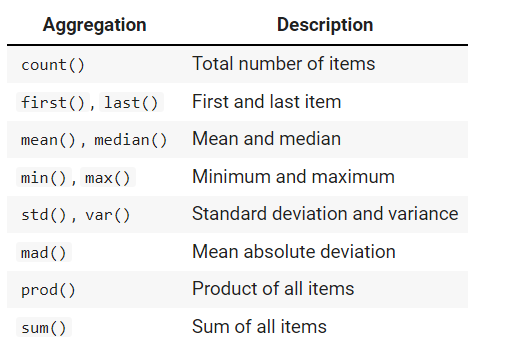

In [ ]:
df1['Marks'].sum()

294

In [ ]:
#Grouping
df =pd.merge(df1,df2,on="Name",how="inner")
df

,Name,RollNo,Marks,Dept
0,Arun,1,80,CSE
1,Vijay,2,75,IT
2,Gopal,3,25,CSE
3,Gowri,4,35,MECH


In [ ]:
df.groupby('Dept')['Marks'].mean()

Dept
CSE     52.5
IT      75.0
MECH    35.0
Name: Marks, dtype: float64

In [ ]:
df.groupby('Dept')['Marks'].describe()

,count,mean,std,min,25%,50%,75%,max
Dept,,,,,,,,
CSE,2.0,52.5,38.890873,25.0,38.75,52.5,66.25,80.0
IT,1.0,75.0,NaN,75.0,75.00,75.0,75.00,75.0
MECH,1.0,35.0,NaN,35.0,35.00,35.0,35.00,35.0


In [ ]:
df.groupby('Dept')['Marks'].aggregate(['min', np.median, max])

,min,median,max
Dept,,,
CSE,25,52.5,80
IT,75,75.0,75
MECH,35,35.0,35


In [ ]:
#Transformation
df.groupby('Dept')['Marks'].transform(lambda x: x/100)

0    0.80
1    0.75
2    0.25
3    0.35
Name: Marks, dtype: float64

# Pivot Tables

We have seen how the ``GroupBy`` abstraction lets us explore relationships within a dataset.
A *pivot table* is a similar operation that is commonly seen in spreadsheets and other programs that operate on tabular data.
The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.
The difference between pivot tables and ``GroupBy`` can sometimes cause confusion; it helps me to think of pivot tables as essentially a *multidimensional* version of ``GroupBy`` aggregation.
That is, you split-apply-combine, but both the split and the combine happen across not a one-dimensional index, but across a two-dimensional grid.

## Motivating Pivot Tables

For the examples in this section, we'll use the database of passengers on the *Titanic*, available through the Seaborn library (see [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)):

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


This contains a wealth of information on each passenger of that ill-fated voyage, including gender, age, class, fare paid, and much more.

## Pivot Tables by Hand

To start learning more about this data, we might begin by grouping according to gender, survival status, or some combination thereof.
If you have read the previous section, you might be tempted to apply a ``GroupBy`` operation–for example, let's look at survival rate by gender:

In [ ]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


## Pivot Table Syntax

Here is the equivalent to the preceding operation using the ``pivot_table`` method of ``DataFrame``s:

In [ ]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


This is eminently more readable than the ``groupby`` approach, and produces the same result.
As you might expect of an early 20th-century transatlantic cruise, the survival gradient favors both women and higher classes.
First-class women survived with near certainty (hi, Rose!), while only one in ten third-class men survived (sorry, Jack!).

### Multi-level pivot tables

Just as in the ``GroupBy``, the grouping in pivot tables can be specified with multiple levels, and via a number of options.
For example, we might be interested in looking at age as a third dimension.
We'll bin the age using the ``pd.cut`` function:

In [ ]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

### Additional pivot table options

The full call signature of the ``pivot_table`` method of ``DataFrame``s is as follows:

```python
# call signature as of Pandas 0.18
DataFrame.pivot_table(data, values=None, index=None, columns=None,
                      aggfunc='mean', fill_value=None, margins=False,
                      dropna=True, margins_name='All')
```

We've already seen examples of the first three arguments; here we'll take a quick look at the remaining ones.
Two of the options, ``fill_value`` and ``dropna``, have to do with missing data and are fairly straightforward; we will not show examples of them here.

The ``aggfunc`` keyword controls what type of aggregation is applied, which is a mean by default.
As in the GroupBy, the aggregation specification can be a string representing one of several common choices (e.g., ``'sum'``, ``'mean'``, ``'count'``, ``'min'``, ``'max'``, etc.) or a function that implements an aggregation (e.g., ``np.sum()``, ``min()``, ``sum()``, etc.).
Additionally, it can be specified as a dictionary mapping a column to any of the above desired options:

In [ ]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47